<a href="https://colab.research.google.com/github/MaisterLupo/AI-Data-Analysis/blob/main/C_di_Pr_ML_3rd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imported Libraries

In [ ]:
# libraries for EDA and ML
import sklearn # algoritmi di machine learninig
import random # seed(random=42)
import numpy as np # array e operazioni matematiche sugli array (deep learning)
import pandas as pd # data representation
import seaborn as sns # data visualization
import lightgbm as lgb # classifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier # classifier
from sklearn import svm, tree, preprocessing # ML algorithm and preprocessing tools
from sklearn.tree import DecisionTreeClassifier # classifier
from sklearn.model_selection import train_test_split, GridSearchCV # tools for data preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler # tools for data preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import statsmodels.api as sm
# libraries for DL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

EDA (Exploratory Data Analysis)

In [ ]:
df = pd.read_excel('/content/Dataset 2 – Early-stage diabetes risk prediction dataset (ESDRPD).xlsx')

######## Explorative Data Analysis #########
print(df.head())

df.shape
# Our dataset shows 520 rows and 17 features. Our Target features is Class.

df.info()
# Our dataset shows no null-values and no missing values

df.nunique()
# Our dataset has 15 asymmetric attributes. Age has discrete values.

###### Declaration of our target variable ########

df_copy = df
df_copy_target = df_copy['Class']

   Age Gender Polyuria Polydipsia Sudden weight loss Weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush Visual blurring Itching Irritability Delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  Partial paresis Muscle stiffness Alopecia Obesity     Class  
0              No              Yes      

In [ ]:
df.shape

(520, 17)

####### Univariate Analysis on 'Class' feature #######

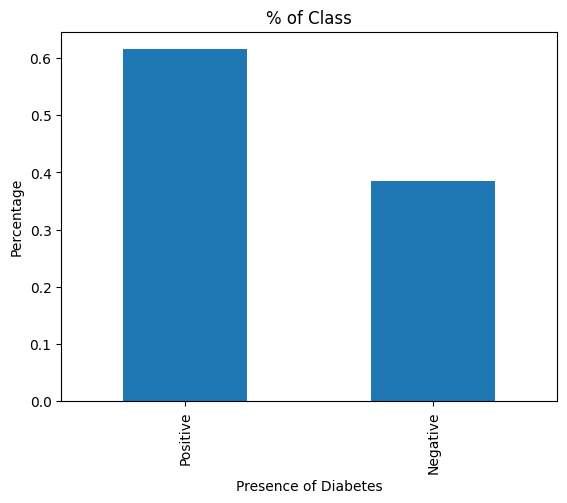

<Figure size 1000x500 with 0 Axes>

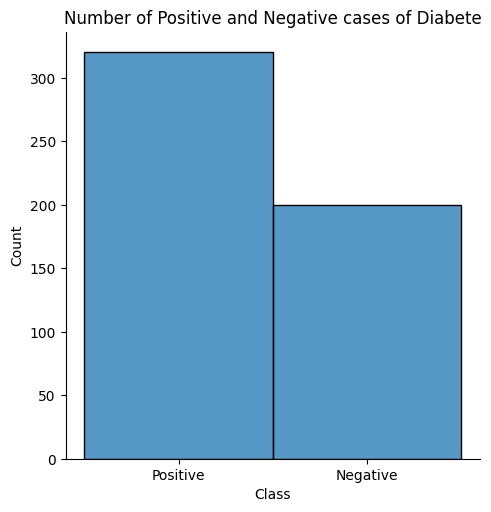

In [ ]:
# we count the occurences of each class inside the data to understand the distribution of values in our dataset
df_copy_target.value_counts(normalize=True).plot(kind='bar')
plt.title("% of Class") # we have a prevalence of positive cases with respect to negatives. The dataset is not balanced
plt.xlabel('Presence of Diabetes')
plt.ylabel('Percentage')
plt.show()

plt.figure(figsize=(10,5))
sns.displot(df_copy_target)
plt.title('Number of Positive and Negative cases of Diabete')
plt.show()

####### Univariate Analysis on Age features #######

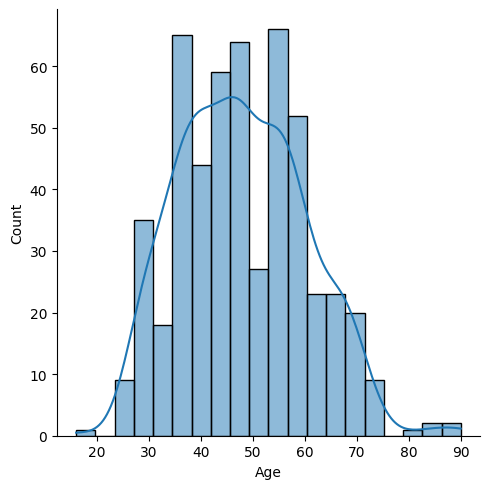

In [ ]:
sns.displot(df_copy['Age'],bins=20, kde='True');

####### Univariate Analysis for all features #########

In [ ]:
# We plot each variable to understand the distribution of the values in order to remove any other irrelevant features

print(df_copy['Gender'].value_counts(normalize=True))
print(df_copy['Polyuria'].value_counts(normalize=True))
print(df_copy['Polydipsia'].value_counts(normalize=True))
print(df_copy['Sudden weight loss'].value_counts(normalize=True))
print(df_copy['Weakness'].value_counts(normalize=True))
print(df_copy['Polyphagia'].value_counts(normalize=True))
print(df_copy['Genital thrush'].value_counts(normalize=True))
print(df_copy['Visual blurring'].value_counts(normalize=True))

Gender
Male      0.630769
Female    0.369231
Name: proportion, dtype: float64
Polyuria
No     0.503846
Yes    0.496154
Name: proportion, dtype: float64
Polydipsia
No     0.551923
Yes    0.448077
Name: proportion, dtype: float64
Sudden weight loss
No     0.582692
Yes    0.417308
Name: proportion, dtype: float64
Weakness
Yes    0.586538
No     0.413462
Name: proportion, dtype: float64
Polyphagia
No     0.544231
Yes    0.455769
Name: proportion, dtype: float64
Genital thrush
No     0.776923
Yes    0.223077
Name: proportion, dtype: float64
Visual blurring
No     0.551923
Yes    0.448077
Name: proportion, dtype: float64


####### Univariate Analysis for all features #########

In [ ]:
print(df_copy['Itching'].value_counts(normalize=True))
print(df_copy['Irritability'].value_counts(normalize=True))
print(df_copy['Delayed healing'].value_counts(normalize=True))
print(df_copy['Partial paresis'].value_counts(normalize=True))
print(df_copy['Muscle stiffness'].value_counts(normalize=True))
print(df_copy['Alopecia'].value_counts(normalize=True))
print(df_copy['Obesity'].value_counts(normalize=True))
print(df_copy['Class'].value_counts(normalize=True))

Itching
No     0.513462
Yes    0.486538
Name: proportion, dtype: float64
Irritability
No     0.757692
Yes    0.242308
Name: proportion, dtype: float64
Delayed healing
No     0.540385
Yes    0.459615
Name: proportion, dtype: float64
Partial paresis
No     0.569231
Yes    0.430769
Name: proportion, dtype: float64
Muscle stiffness
No     0.625
Yes    0.375
Name: proportion, dtype: float64
Alopecia
No     0.655769
Yes    0.344231
Name: proportion, dtype: float64
Obesity
No     0.830769
Yes    0.169231
Name: proportion, dtype: float64
Class
Positive    0.615385
Negative    0.384615
Name: proportion, dtype: float64


######## Bivariate Analysis relationship between target variable and the variable Age ###########

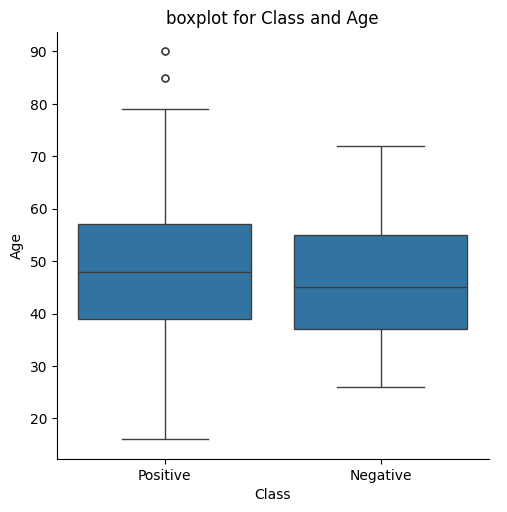

In [ ]:
sns.catplot(x='Class', y='Age', data=df_copy, kind='box')
plt.title('boxplot for Class and Age')
plt.show()

############## Bivariate Analysis between Gender and Class ######################

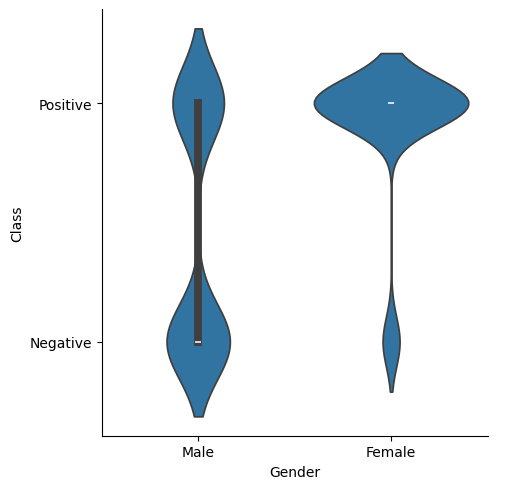

In [ ]:
sns.catplot(data=df, x="Gender", y="Class", kind='violin')
plt.show()

################ Bivariate analysis between Gender and Polydipsia ##############

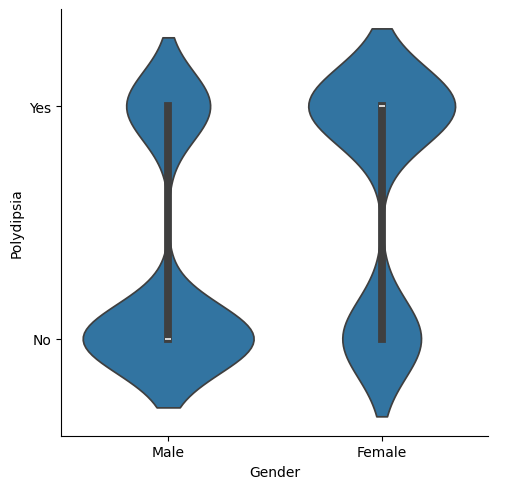

In [ ]:
sns.catplot(data=df, x="Gender", y="Polydipsia", kind='violin')
plt.show()

Encoding features
Labels for all variables (except Age, Gender): 'No': 0, 'Yes': 1
Labels for Gender: 'Male': 0, 'Female': 1

In [ ]:
# Instantiate the mapping
le = preprocessing.LabelEncoder()

# assigning the features

features = [f for f in df_copy.columns if f not in ["Age", 'Gender']]

# applying LE on the features
for feature in features:
  df_copy[feature] = le.fit_transform(df_copy[feature])

df_copy['Gender'] = le.fit_transform(df_copy['Gender'])

We plot each variable to understand the distribution of the values in order to remove any other irrelevant features

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Polyuria'}>],
       [<Axes: title={'center': 'Polydipsia'}>,
        <Axes: title={'center': 'Sudden weight loss'}>],
       [<Axes: title={'center': 'Weakness'}>,
        <Axes: title={'center': 'Polyphagia'}>]], dtype=object)

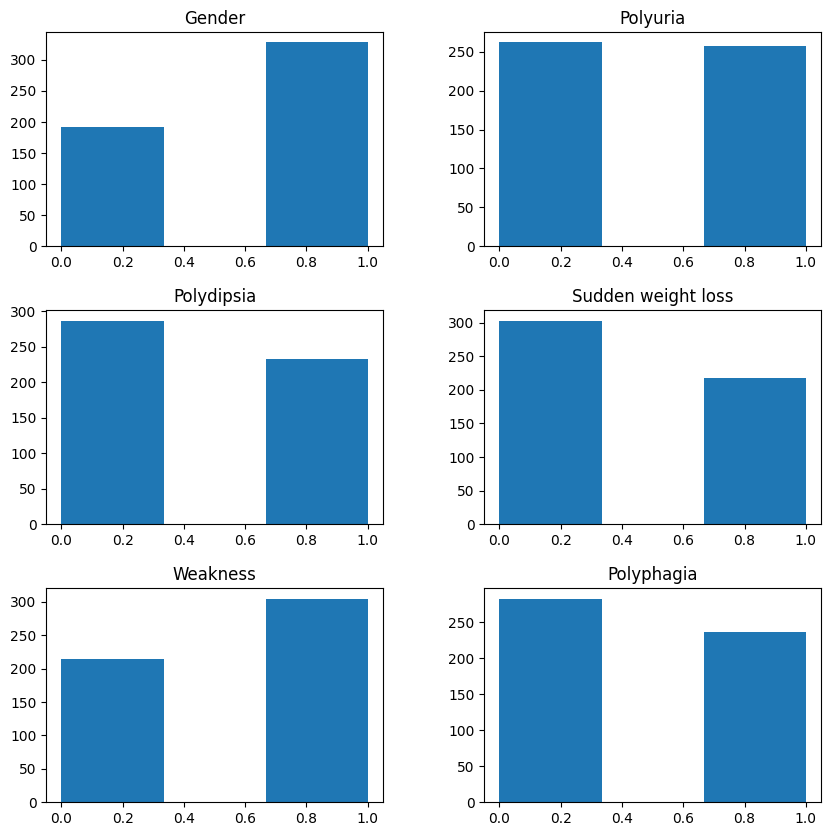

In [ ]:
df_copy1 = df_copy.drop(['Age','Genital thrush', 'Visual blurring', 'Itching', 'Irritability','Delayed healing', 'Partial paresis','Muscle stiffness', 'Alopecia','Obesity','Class'], axis = 1)
df_copy1.hist(figsize=[10,10], bins=3, grid=False)

array([[<Axes: title={'center': 'Genital thrush'}>,
        <Axes: title={'center': 'Visual blurring'}>,
        <Axes: title={'center': 'Itching'}>],
       [<Axes: title={'center': 'Irritability'}>,
        <Axes: title={'center': 'Delayed healing'}>,
        <Axes: title={'center': 'Partial paresis'}>],
       [<Axes: title={'center': 'Muscle stiffness'}>,
        <Axes: title={'center': 'Alopecia'}>,
        <Axes: title={'center': 'Obesity'}>]], dtype=object)

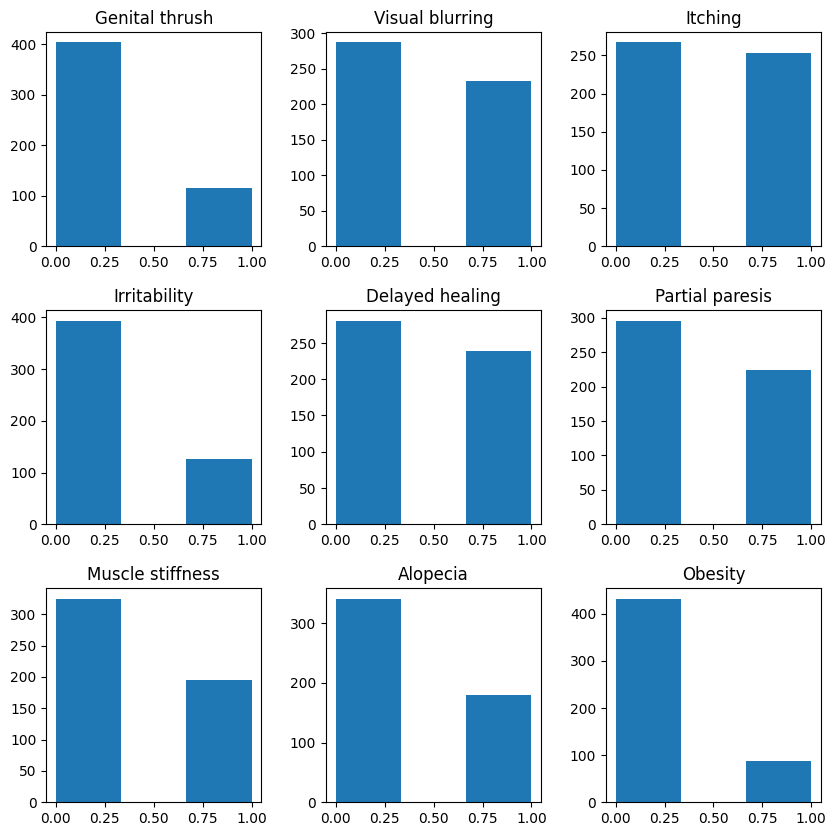

In [ ]:
df_copy2 = df_copy.drop(['Age','Gender', 'Polyuria', 'Polydipsia', 'Sudden weight loss','Weakness', 'Polyphagia','Class'], axis = 1)
df_copy2.hist(figsize=[10,10],bins=3, grid=False)

We describe each column to understand if most of the data fall within one percentile. In this way we can remove variables that does not have a huge impact on the target variable

In [ ]:
print(df_copy.describe().T)

                    count       mean        std   min   25%   50%   75%   max
Age                 520.0  48.028846  12.151466  16.0  39.0  47.5  57.0  90.0
Gender              520.0   0.630769   0.483061   0.0   0.0   1.0   1.0   1.0
Polyuria            520.0   0.496154   0.500467   0.0   0.0   0.0   1.0   1.0
Polydipsia          520.0   0.448077   0.497776   0.0   0.0   0.0   1.0   1.0
Sudden weight loss  520.0   0.417308   0.493589   0.0   0.0   0.0   1.0   1.0
Weakness            520.0   0.586538   0.492928   0.0   0.0   1.0   1.0   1.0
Polyphagia          520.0   0.455769   0.498519   0.0   0.0   0.0   1.0   1.0
Genital thrush      520.0   0.223077   0.416710   0.0   0.0   0.0   0.0   1.0
Visual blurring     520.0   0.448077   0.497776   0.0   0.0   0.0   1.0   1.0
Itching             520.0   0.486538   0.500300   0.0   0.0   0.0   1.0   1.0
Irritability        520.0   0.242308   0.428892   0.0   0.0   0.0   0.0   1.0
Delayed healing     520.0   0.459615   0.498846   0.0   0.0   0.

######### Multivariate analysis: we understand the positive and negative relationship between the indipendent variables #########

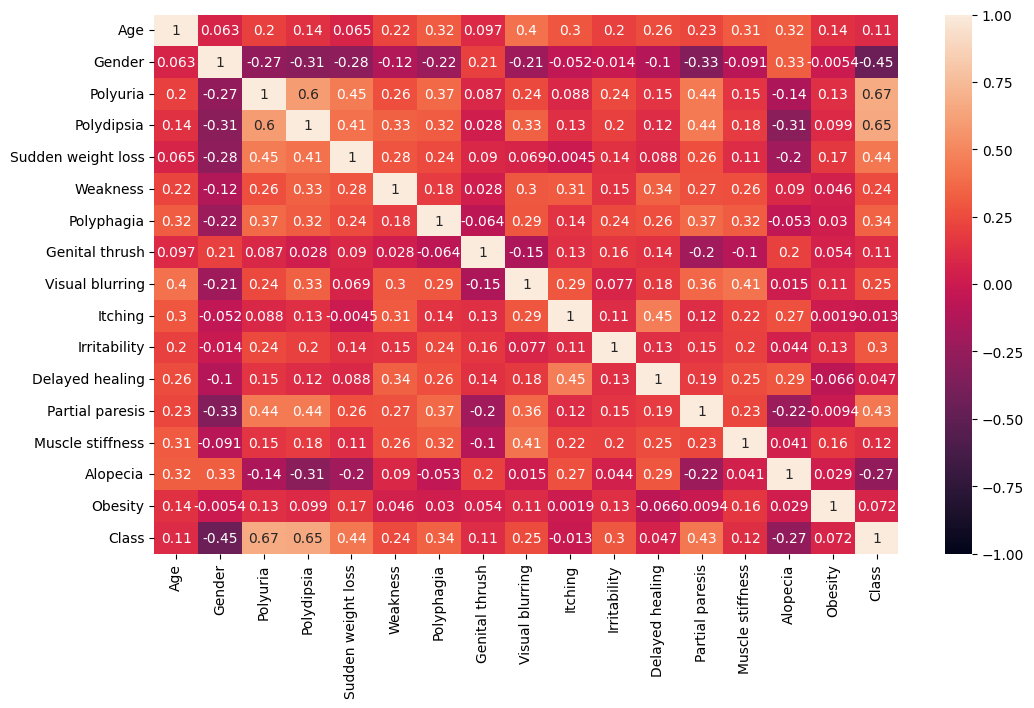

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(df_copy.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

From the multivariate analysis, particularly through the
examination of the heatmap, we can identify the variables
that exhibit the strongest correlations with our class.

Age-Related Correlations: As age increases, there is a
significant rise in the incidence of visual blurring, muscle
stiffness, and alopecia.

Gender-Related Correlations
  Women: Women show higher prevalence rates of polydipsia, sudden weight loss,
partial paresis, and diabetes compared to men.
  Men: Men are more prone to genital thrush and alopecia.

Polyuria: it is positively correlated with poly-
dipsia, sudden weight loss, polyphagia, partial paresis, and
diabetes.

Polydipsia: it shows positive correlations with
polyuria, sudden weight loss, weakness, polyphagia, visual
blurring, partial paresis, and diabetes.

Sudden Weight Loss: it is more com-
mon in women and is positively correlated with polyuria,
polydipsia, weakness, and diabetes.

Weakness: it is positively correlated with age,
polyuria, polydipsia, itching, delayed healing, partial paresis,
and muscle stiffness.

Polyphagia: it is positively correlated with age,
polyuria, polydipsia, sudden weight loss, visual blurring,
partial paresis, muscle stiffness, and diabetes.

Genital Thrush: it is more prevalent in men.
Visual Blurring Visual blurring is positively correlated
with age, is more common in women, and is associated
with polydipsia, polyphagia, itching, partial paresis, muscle
stiffness, and diabetes.

Itching: it is positively correlated with weakness,
visual blurring, and delayed healing.

Irritability: it is positively correlated with
polyuria.

Delayed Healing: it is positively corre-
lated with age, weakness, itching, and muscle stiffness.

Partial Paresis: it is positively correlated
with age, is more common in women, and is associated
with polyuria, polydipsia, polyphagia, visual blurring, and
diabetes. It is negatively correlated with alopecia.

Muscle Stiffness: it is positively corre-
lated with age, polyphagia, visual blurring, and diabetes.

Alopecia: it is positively correlated with age, is
more common in men, and is negatively correlated with
polydipsia, itching, delayed healing, and diabetes.

Obesity: it does not show significant correlations
with the other variables in this study.

Diabetes: it is more prevalent in women and
is positively correlated with polyuria, polydipsia, sudden
weight loss, polyphagia, and partial paresis. It is negatively
correlated with alopecia.

Machine Learning Algorithms

In [ ]:
######## Separation of our target variable from the dataset ########

df_copy = df_copy.drop(['Class'], axis = 1)

####### label enconding on our target variable

df_copy_target = le.fit_transform(df_copy_target)

######### Normalization #############
#------------------
transformer = MinMaxScaler()
transformer.fit(df_copy)
df_copy_norm = transformer.transform(df_copy)
#---------------------

train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

# train is now 75% of the entire data set
train_x, test_x, train_y, test_y = train_test_split(df_copy_norm, df_copy_target, test_size=1 - train_ratio, random_state=42)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
val_x, test_x, val_y, test_y = train_test_split(test_x, test_y, test_size=test_ratio/(test_ratio + validation_ratio), random_state=42)

print(train_x, val_x, test_x)
print('Train: {}, Val: {}, and Test: {}'.format(len(train_x), len(val_x), len(test_x)))
print('Total: {}'.format(len(train_x) + len(val_x) + len(test_x)))

[[0.27027027 0.         1.         ... 0.         0.         0.        ]
 [0.55405405 1.         0.         ... 1.         0.         0.        ]
 [0.75675676 1.         1.         ... 1.         1.         0.        ]
 ...
 [0.32432432 0.         1.         ... 1.         0.         0.        ]
 [0.55405405 1.         1.         ... 0.         0.         0.        ]
 [1.         0.         0.         ... 1.         1.         0.        ]] [[0.2972973  1.         1.         ... 0.         0.         0.        ]
 [0.43243243 0.         1.         ... 1.         0.         0.        ]
 [0.68918919 1.         0.         ... 1.         1.         1.        ]
 ...
 [0.37837838 1.         1.         ... 1.         1.         0.        ]
 [0.39189189 0.         0.         ... 0.         0.         0.        ]
 [0.40540541 1.         0.         ... 0.         1.         0.        ]] [[0.25675676 0.         1.         ... 0.         1.         0.        ]
 [0.54054054 1.         1.         ... 

Grid Search for SVC

In [ ]:
####### Grid Search for SVC ######
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(train_x, train_y)


# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

grid_predictions = grid.predict(test_x)

# print classification report
print(classification_report(test_y, grid_predictions))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.726 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.726 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.726 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.918 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.877 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.932 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.875 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.903 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.603 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

Grid Search for AdaBoost

In [ ]:
# defining parameter range
param_grid = {'n_estimators': [10, 50, 100, 500],
              'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]}

grid = GridSearchCV(AdaBoostClassifier(), param_grid, refit = True, scoring='accuracy', verbose = 3)

# fitting the model for grid search
grid.fit(train_x, train_y)

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

# print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

grid_predictions = grid.predict(test_x)

# print classification report
print(classification_report(test_y, grid_predictions))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END learning_rate=0.0001, n_estimators=10;, score=0.795 total time=   0.0s
[CV 2/5] END learning_rate=0.0001, n_estimators=10;, score=0.849 total time=   0.0s
[CV 3/5] END learning_rate=0.0001, n_estimators=10;, score=0.890 total time=   0.0s
[CV 4/5] END learning_rate=0.0001, n_estimators=10;, score=0.806 total time=   0.0s
[CV 5/5] END learning_rate=0.0001, n_estimators=10;, score=0.792 total time=   0.0s
[CV 1/5] END learning_rate=0.0001, n_estimators=50;, score=0.795 total time=   0.1s
[CV 2/5] END learning_rate=0.0001, n_estimators=50;, score=0.849 total time=   0.1s
[CV 3/5] END learning_rate=0.0001, n_estimators=50;, score=0.890 total time=   0.1s
[CV 4/5] END learning_rate=0.0001, n_estimators=50;, score=0.806 total time=   0.1s
[CV 5/5] END learning_rate=0.0001, n_estimators=50;, score=0.792 total time=   0.1s
[CV 1/5] END learning_rate=0.0001, n_estimators=100;, score=0.795 total time=   0.3s
[CV 2/5] END 

Grid search for LGB

In [ ]:
# defining parameter range
param_grid = {
    'learning_rate': [0.005, 0.01],
    'n_estimators': [8,16,24],
    'num_leaves': [6,8,12,16], # large num_leaves helps improve accuracy but might lead to over-fitting
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'max_bin':[255, 510], # large max_bin helps improve accuracy but might slow down training progress
    'random_state' : [500],
    'colsample_bytree' : [0.64, 0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }

grid = GridSearchCV(lgb.LGBMClassifier(), param_grid, verbose=3, refit=True, cv=2, n_jobs=-1)

# fitting the model for grid search
grid.fit(train_x, train_y)

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

# print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

grid_predictions = grid.predict(test_x)

# print classification report
print(classification_report(test_y, grid_predictions))

Fitting 2 folds for each of 1728 candidates, totalling 3456 fits
[LightGBM] [Info] Number of positive: 218, number of negative: 145
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 71
[LightGBM] [Info] Number of data points in the train set: 363, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.600551 -> initscore=0.407761
[LightGBM] [Info] Start training from score 0.407761
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifiers

In [ ]:
####### Classifiers #########

clf_svc = svm.SVC(C = 10, gamma =  1, kernel = 'rbf')
clf_r = RandomForestClassifier(n_estimators=50, random_state=42)
clf_a = AdaBoostClassifier(learning_rate=0.1, n_estimators=500)
clf_d = DecisionTreeClassifier()
clf_LGB = lgb.LGBMClassifier()

Model fit SVC

In [ ]:
clf_svc.fit(train_x, train_y)

SVC(C=10, gamma=1)

Model Predict SVC

In [ ]:
pred_y = clf_svc.predict(test_x)
print('Predicted {} samples: {}'.format(len(pred_y), pred_y))
print('GT {} samples: {}'.format(len(test_y), test_y))
print('Classifier on val set: ', clf_svc.score(val_x, val_y))

Predicted 79 samples: [1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1
 0 0 1 0 0]
GT 79 samples: [1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1
 0 0 1 0 0]
Classifier on val set:  0.9743589743589743


Model fit Random Forest

In [ ]:
clf_r.fit(train_x, train_y)

RandomForestClassifier(n_estimators=50, random_state=42)

Model Predict RF

In [ ]:
pred_y_r = clf_r.predict(test_x)
print('Predicted {} samples: {}'.format(len(pred_y_r), pred_y_r))
print('GT {} samples: {}'.format(len(test_y), test_y))
print('Classifier on val set: ', clf_r.score(val_x, val_y))

Predicted 79 samples: [1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1
 0 0 1 0 0]
GT 79 samples: [1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1
 0 0 1 0 0]
Classifier on val set:  1.0


Plotting Random Forest graph

Average number of nodes 71
Average maximum depth 9


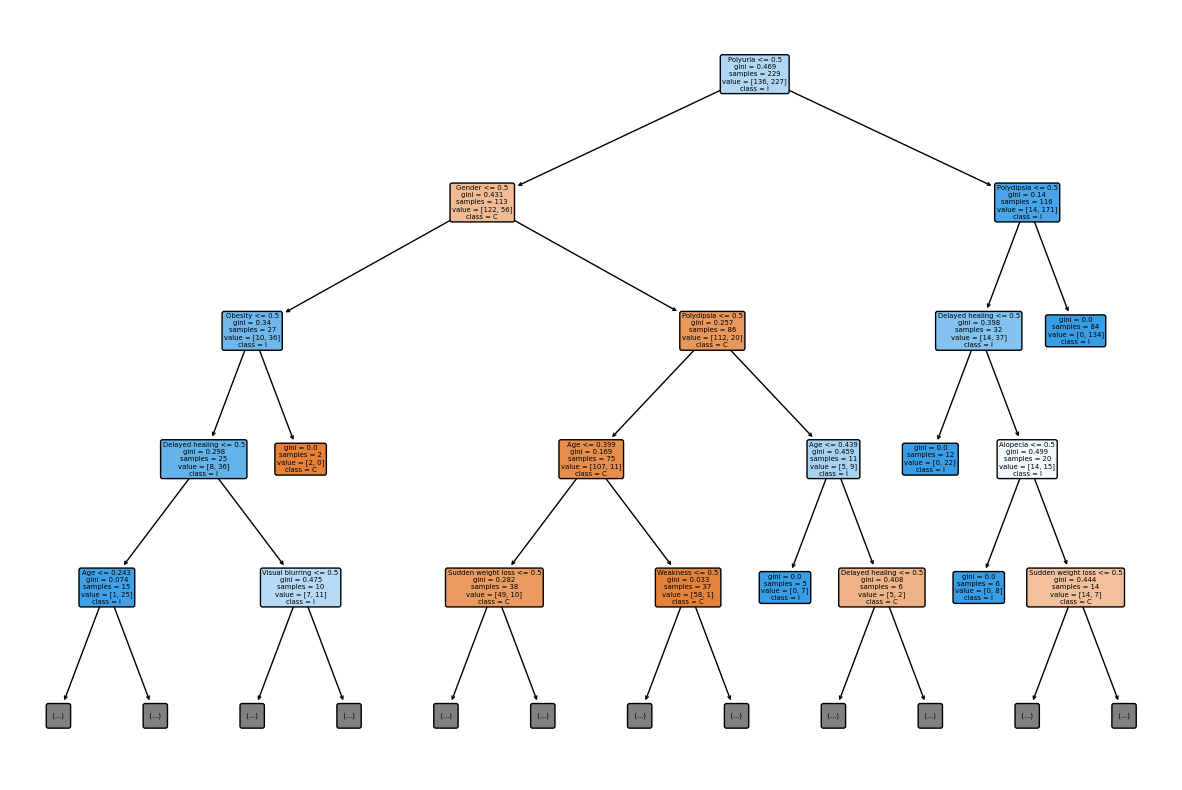

In [ ]:
# Stats about the trees in random forest
n_nodes = []
max_depths = []
for ind_tree in clf_r.estimators_:
  n_nodes.append(ind_tree.tree_.node_count)
  max_depths.append(ind_tree.tree_.max_depth)

print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

# plot first tree (index 0)
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(15, 10))
plot_tree(clf_r.estimators_[0], max_depth=4, feature_names = df.columns[:-1], class_names = df.columns[-1], filled=True, impurity=True, rounded=True)
plt.show()


Model Fit AdaBoost

In [ ]:
clf_a.fit(train_x, train_y)

AdaBoostClassifier(learning_rate=0.1, n_estimators=500)

Model Predict AB

In [ ]:
pred_y_a = clf_a.predict(test_x)
print('Predicted {} samples: {}'.format(len(pred_y_a), pred_y_a))
print('GT {} samples: {}'.format(len(test_y), test_y))
print('Classifier on val set: ', clf_a.score(val_x, val_y))

Predicted 79 samples: [1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1
 0 0 1 0 1]
GT 79 samples: [1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1
 0 0 1 0 0]
Classifier on val set:  0.9615384615384616


Model fit Decision Tree

In [ ]:
clf_d.fit(train_x, train_y)

DecisionTreeClassifier()

Model Predict DT

In [ ]:
pred_y_d = clf_d.predict(test_x)
print('Predicted {} samples: {}'.format(len(pred_y_d), pred_y_d))
print('GT {} samples: {}'.format(len(test_y), test_y))
print('Classifier on val set: ', clf_d.score(val_x, val_y))

Predicted 79 samples: [1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1
 0 0 1 0 0]
GT 79 samples: [1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1
 0 0 1 0 0]
Classifier on val set:  0.9487179487179487


Ploting Decision Tree

Decision tree structure has 59 nodes and has the following tree structure:



[Text(0.6213235294117647, 0.9166666666666666, 'Polyuria <= 0.5\ngini = 0.48\nsamples = 363\nvalue = [145, 218]\nclass = l'),
 Text(0.3602941176470588, 0.75, 'Gender <= 0.5\ngini = 0.403\nsamples = 186\nvalue = [134, 52]\nclass = C'),
 Text(0.19117647058823528, 0.5833333333333334, 'Alopecia <= 0.5\ngini = 0.434\nsamples = 44\nvalue = [14, 30]\nclass = l'),
 Text(0.11764705882352941, 0.4166666666666667, 'Age <= 0.25\ngini = 0.257\nsamples = 33\nvalue = [5, 28]\nclass = l'),
 Text(0.058823529411764705, 0.25, 'Muscle stiffness <= 0.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4]\nclass = C'),
 Text(0.029411764705882353, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.08823529411764706, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.17647058823529413, 0.25, 'Irritability <= 0.5\ngini = 0.077\nsamples = 25\nvalue = [1, 24]\nclass = l'),
 Text(0.14705882352941177, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.20588235294117646, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.2647058823529412, 0.416

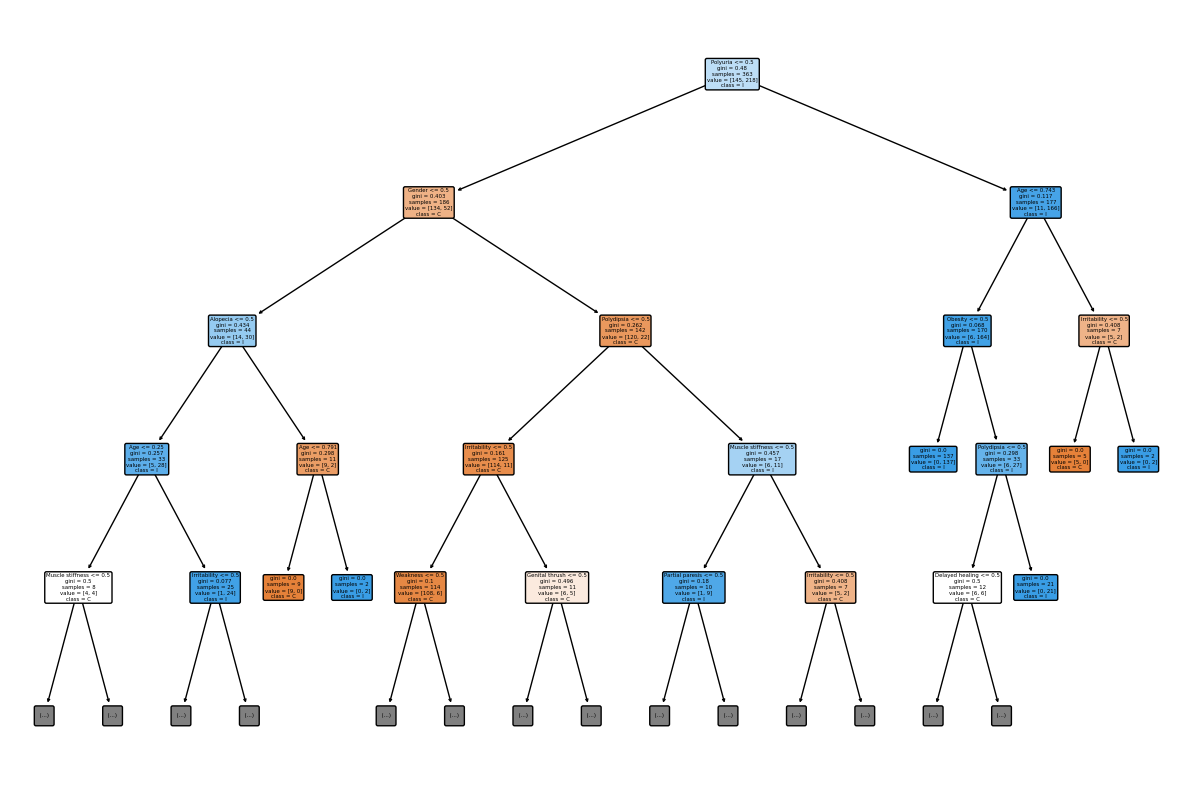

In [ ]:
n_nodes = clf_d.tree_.node_count
print("Decision tree structure has {n} nodes and has the following tree structure:\n".format(n=n_nodes))
fig = plt.figure(figsize=(15, 10))
tree.plot_tree(clf_d, max_depth=4, feature_names = df.columns[:-1], class_names = df.columns[-1], filled=True, impurity=True, rounded=True)

Model fit LB

In [ ]:
clf_LGB.fit(train_x, train_y)

[LightGBM] [Info] Number of positive: 218, number of negative: 145
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 71
[LightGBM] [Info] Number of data points in the train set: 363, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.600551 -> initscore=0.407761
[LightGBM] [Info] Start training from score 0.407761
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

LGBMClassifier()

Model Predict LB

In [ ]:
pred_y_lg = clf_LGB.predict(test_x)
print('Predicted {} samples: {}'.format(len(pred_y_lg), pred_y_lg))
print('GT {} samples: {}'.format(len(test_y), test_y))
print('Classifier on val set: ', clf_LGB.score(val_x, val_y))

Predicted 79 samples: [1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1
 0 0 1 0 0]
GT 79 samples: [1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1
 0 0 1 0 0]
Classifier on val set:  0.9871794871794872


Plotting LGB

['Age', 'Gender', 'Polyuria', 'Polydipsia', 'Sudden weight loss', 'Weakness', 'Polyphagia', 'Genital thrush', 'Visual blurring', 'Itching', 'Irritability', 'Delayed healing', 'Partial paresis', 'Muscle stiffness', 'Alopecia', 'Obesity']


<Axes: >

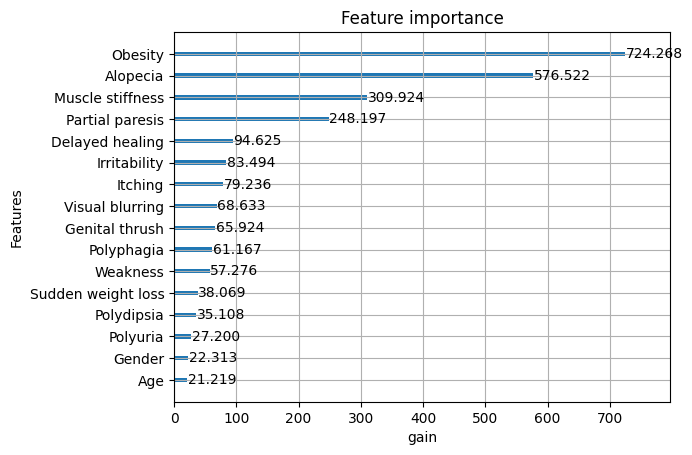

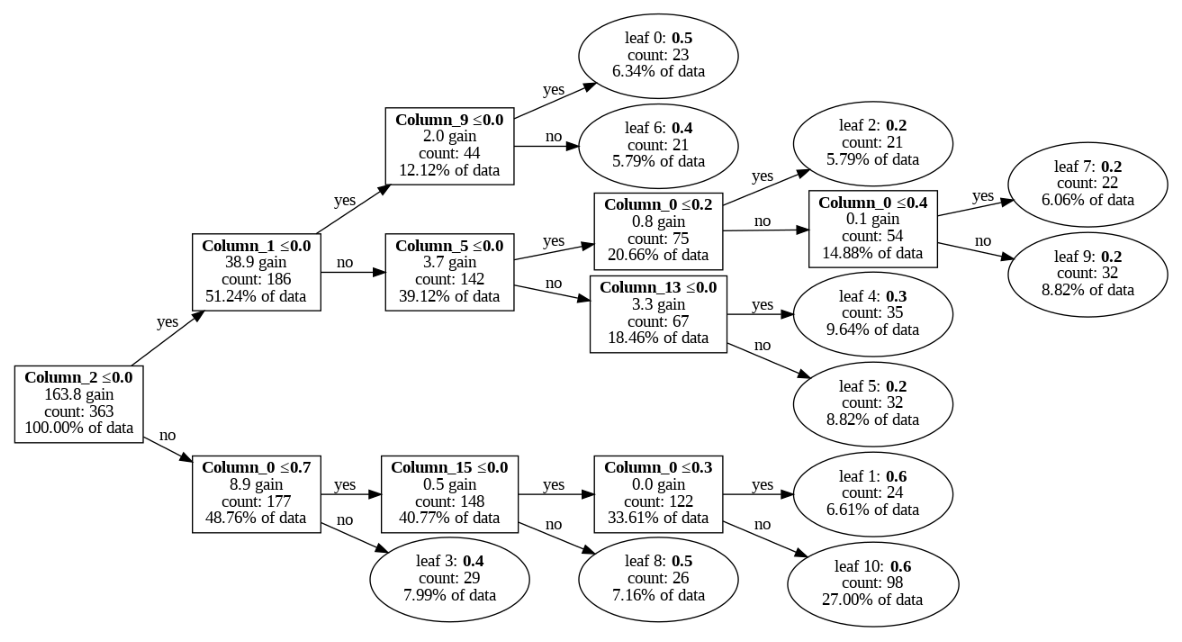

In [ ]:
feat = [v for v in df_copy.columns]
print(feat)

ax = lgb.plot_importance(clf_LGB, title='Feature importance', xlabel='gain', ylabel='Features', importance_type='gain')
ax.set_yticklabels(feat)
lgb.plot_tree(clf_LGB, tree_index=0, figsize=(15, 10), show_info=['split_gain','internal_count', 'leaf_count', 'data_percentage'] , precision=1, orientation='horizontal')


In [ ]:
print('Classifier svc on train set: ', clf_svc.score(train_x, train_y))
print('Classifier decision tree on train set: ', clf_d.score(train_x, train_y))
print('Classifier random forest on train set: ', clf_r.score(train_x, train_y))
print('Classifier adaboost on train set: ', clf_a.score(train_x, train_y))
print('Classifier lgb on train set: ', clf_LGB.score(train_x, train_y))

Classifier svc on train set:  0.9944903581267218
Classifier decision tree on train set:  1.0
Classifier random forest on train set:  1.0
Classifier adaboost on train set:  0.9366391184573003
Classifier lgb on train set:  1.0


Accuracy ratios

In [ ]:
# accuracy score svc
print('Final Accuracy with SVC: {:.3f}'.format(accuracy_score(test_y, pred_y)))
# accuracy score random forest
print('Final Accuracy with Random Forest: {:.3f}'.format(accuracy_score(test_y, pred_y_r)))
# accuracy score AdaBoost
print('Final Accuracy with AdaBoost: {:.3f}'.format(accuracy_score(test_y, pred_y_a)))
# accuracy score DecisionTree
print('Final Accuracy with Decision Tree: {:.3f}'.format(accuracy_score(test_y, pred_y_d)))
# accuracy score LightGB
print('Final Accuracy with LightGB: {:.3f}'.format(accuracy_score(test_y, pred_y_lg)))

Final Accuracy with SVC: 0.987
Final Accuracy with Random Forest: 1.000
Final Accuracy with AdaBoost: 0.937
Final Accuracy with Decision Tree: 0.962
Final Accuracy with LightGB: 0.987


######### Classification report #########

In [ ]:
print('Classification report for svc')
print(classification_report(test_y, pred_y))

print('Classification report for Random Forest')
print(classification_report(test_y, pred_y_r))

print('Classification report for AdaBoost')
print(classification_report(test_y, pred_y_a))

print('Classification report for Decision Tree')
print(classification_report(test_y, pred_y_d))

print('Classification report for LightGB')
print(classification_report(test_y, pred_y_lg))

Classification report for svc
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.98      0.99        50

    accuracy                           0.99        79
   macro avg       0.98      0.99      0.99        79
weighted avg       0.99      0.99      0.99        79

Classification report for Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        50

    accuracy                           1.00        79
   macro avg       1.00      1.00      1.00        79
weighted avg       1.00      1.00      1.00        79

Classification report for AdaBoost
              precision    recall  f1-score   support

           0       0.96      0.86      0.91        29
           1       0.92      0.98      0.95        50

    accuracy                           0.94        79
   macro avg       0.94

Confusion Matrix for Support Vector Machines

Confusion Matrix for SVC
[[29  0]
 [ 1 49]]
[1.   0.98]


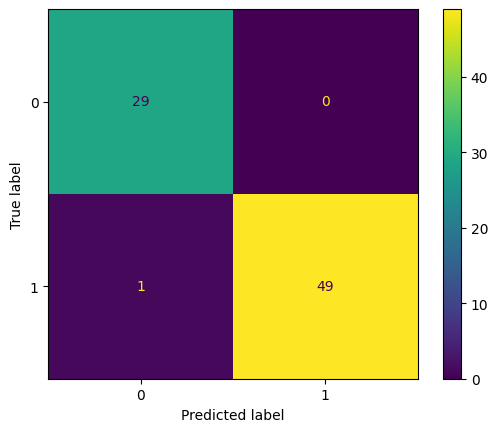

In [ ]:
print('Confusion Matrix for SVC')
matrix_svc = confusion_matrix(test_y, pred_y)
print(matrix_svc)
print(matrix_svc.diagonal() / matrix_svc.sum(axis=1))
cm_svc = ConfusionMatrixDisplay(matrix_svc)
cm_svc.plot()

Confusion Matrix for Random Forest

Confusion Matrix for Random Forest
[[29  0]
 [ 0 50]]
[1. 1.]


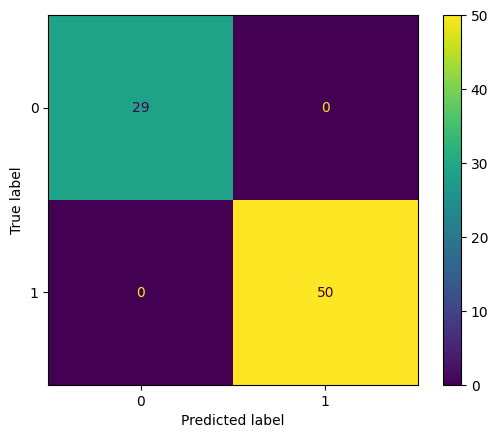

In [ ]:

print('Confusion Matrix for Random Forest')
matrix_r = confusion_matrix(test_y, pred_y_r)
print(matrix_r)
print(matrix_r.diagonal() / matrix_r.sum(axis=1))
cm_r = ConfusionMatrixDisplay(matrix_r)
cm_r.plot()

Confusion Matrix for AdaBoost

Confusion Matrix for AdaBoost
[[25  4]
 [ 1 49]]
[0.86206897 0.98      ]


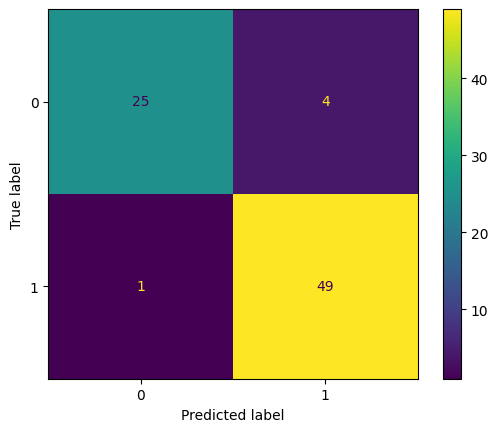

In [ ]:
print('Confusion Matrix for AdaBoost')
matrix_a = confusion_matrix(test_y, pred_y_a)
print(matrix_a)
print(matrix_a.diagonal() / matrix_a.sum(axis=1))
cm_a = ConfusionMatrixDisplay(matrix_a)
cm_a.plot()

Confusion Matrix for Decision Tree

Confusion Matrix for DecisionTree
[[28  1]
 [ 2 48]]
[0.96551724 0.96      ]


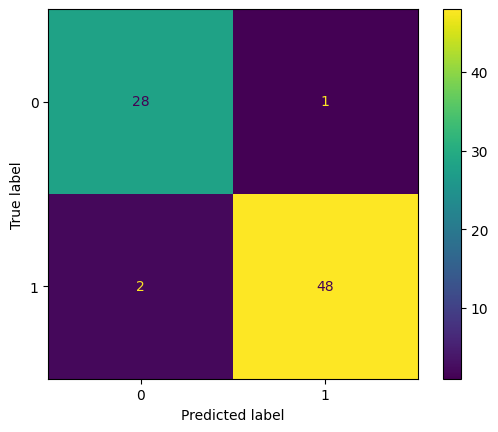

In [ ]:
print('Confusion Matrix for DecisionTree')
matrix_d = confusion_matrix(test_y, pred_y_d)
print(matrix_d)
print(matrix_d.diagonal() / matrix_d.sum(axis=1))
cm_d = ConfusionMatrixDisplay(matrix_d)
cm_d.plot()

Confusion Matrix for LightGB

Confusion Matrix for LightGB
[[29  0]
 [ 1 49]]
[1.   0.98]


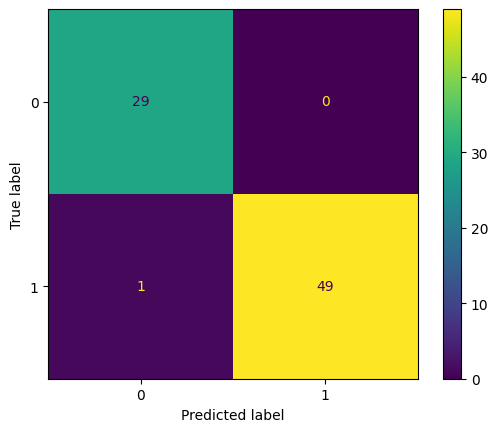

In [ ]:
print('Confusion Matrix for LightGB')
matrix_lg = confusion_matrix(test_y, pred_y_lg)
print(matrix_lg)
print(matrix_lg.diagonal() / matrix_lg.sum(axis=1))
cm_lg = ConfusionMatrixDisplay(matrix_lg)
cm_lg.plot()

ROC curve

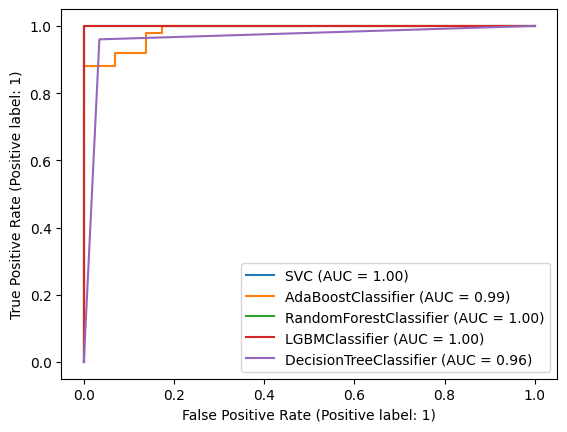

In [ ]:
from sklearn.metrics import RocCurveDisplay

ax = plt.gca()
RocCurveDisplay.from_estimator(clf_svc, test_x, test_y, ax=ax)
RocCurveDisplay.from_estimator(clf_a, test_x, test_y, ax=ax)
RocCurveDisplay.from_estimator(clf_r, test_x, test_y, ax=ax)
RocCurveDisplay.from_estimator(clf_LGB, test_x, test_y, ax=ax)
RocCurveDisplay.from_estimator(clf_d, test_x, test_y, ax=ax)
plt.show()

In [ ]:
train_x.shape[1]

16

Deep Learning: MLP models

In [ ]:
# Creation of the MLP model

# 1st model

model_1 = keras.models.Sequential([
    keras.layers.Dense(8, input_dim=train_x.shape[1], activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


# 2nd model

model_2 = keras.models.Sequential([
    keras.layers.Dense(16, input_dim=train_x.shape[1], activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


# 3rd model

model_3 = keras.models.Sequential([
    keras.layers.Dense(8, input_dim=train_x.shape[1], activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

Models compile

In [ ]:
epochs = 25
batchs = 5

model_1.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

model_2.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

model_3.compile(
    optimizer='sgd',
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

Model_1

In [ ]:
history = model_1.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=epochs, batch_size = batchs)
model_1.summary()

Epoch 1/25
73/73 [==============================] - 1s 6ms/step - loss: 0.6543 - accuracy: 0.6832 - val_loss: 0.6249 - val_accuracy: 0.8333
Epoch 2/25
73/73 [==============================] - 0s 2ms/step - loss: 0.5831 - accuracy: 0.7934 - val_loss: 0.5347 - val_accuracy: 0.8590
Epoch 3/25
73/73 [==============================] - 0s 2ms/step - loss: 0.4883 - accuracy: 0.8375 - val_loss: 0.4171 - val_accuracy: 0.8718
Epoch 4/25
73/73 [==============================] - 0s 3ms/step - loss: 0.4015 - accuracy: 0.8678 - val_loss: 0.3485 - val_accuracy: 0.8974
Epoch 5/25
73/73 [==============================] - 0s 4ms/step - loss: 0.3426 - accuracy: 0.8843 - val_loss: 0.3110 - val_accuracy: 0.8974
Epoch 6/25
73/73 [==============================] - 0s 4ms/step - loss: 0.2997 - accuracy: 0.9036 - val_loss: 0.2857 - val_accuracy: 0.8974
Epoch 7/25
73/73 [==============================] - 0s 3ms/step - loss: 0.2725 - accuracy: 0.9118 - val_loss: 0.2804 - val_accuracy: 0.8846
Epoch 8/25
73/73 [==

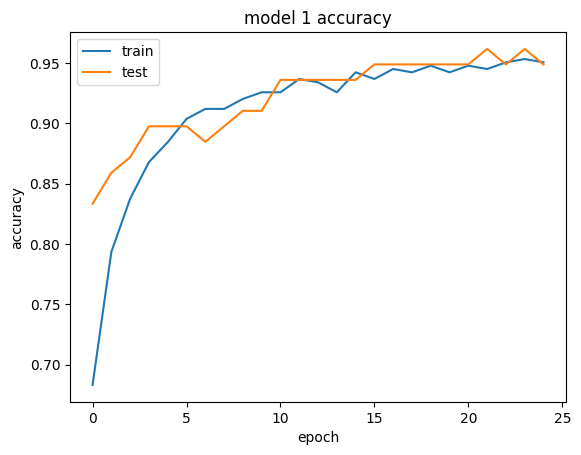

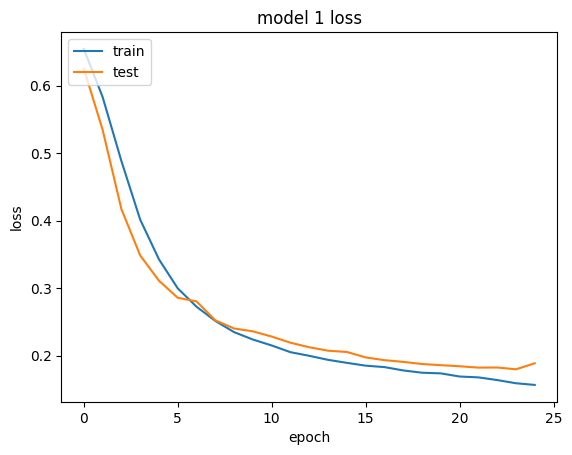

In [ ]:
# Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model 1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model 1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Model_1 Performance

In [ ]:
print('Model_1 train set performance: ')
model_1.evaluate(train_x, train_y)
print('Model_1 test set performance: ')
model_1.evaluate(test_x, test_y)

Model_1 train set performance: 
12/12 [==============================] - 0s 2ms/step - loss: 0.1545 - accuracy: 0.9532
Model_1 test set performance: 
3/3 [==============================] - 0s 4ms/step - loss: 0.1361 - accuracy: 0.9620


[0.13612842559814453, 0.9620253443717957]

3/3 [==============================] - 0s 3ms/step
Confusion Matrix for Model_1
[[27  2]
 [ 1 49]]
[0.93103448 0.98      ]


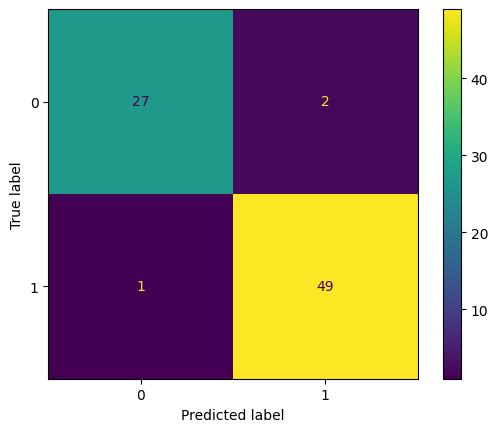

In [ ]:
y_pred = model_1.predict(test_x)
y_pred = np.round(y_pred)
print('Confusion Matrix for Model_1')
matrix_model1 = confusion_matrix(test_y, y_pred)
print(matrix_model1)
print(matrix_model1.diagonal() / matrix_model1.sum(axis=1))
cm_1 = ConfusionMatrixDisplay(matrix_model1)
cm_1.plot()

Model_2

In [ ]:
history2 = model_2.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=epochs, batch_size = batchs)
model_2.summary()

Epoch 1/25
73/73 [==============================] - 1s 5ms/step - loss: 0.6194 - accuracy: 0.5895 - val_loss: 0.5198 - val_accuracy: 0.6795
Epoch 2/25
73/73 [==============================] - 0s 3ms/step - loss: 0.5313 - accuracy: 0.6749 - val_loss: 0.4428 - val_accuracy: 0.7821
Epoch 3/25
73/73 [==============================] - 0s 2ms/step - loss: 0.4618 - accuracy: 0.7769 - val_loss: 0.3862 - val_accuracy: 0.8333
Epoch 4/25
73/73 [==============================] - 0s 2ms/step - loss: 0.4046 - accuracy: 0.8650 - val_loss: 0.3404 - val_accuracy: 0.8974
Epoch 5/25
73/73 [==============================] - 0s 3ms/step - loss: 0.3574 - accuracy: 0.9036 - val_loss: 0.3041 - val_accuracy: 0.9487
Epoch 6/25
73/73 [==============================] - 0s 3ms/step - loss: 0.3167 - accuracy: 0.9174 - val_loss: 0.2744 - val_accuracy: 0.9487
Epoch 7/25
73/73 [==============================] - 0s 2ms/step - loss: 0.2862 - accuracy: 0.9284 - val_loss: 0.2550 - val_accuracy: 0.9487
Epoch 8/25
73/73 [==

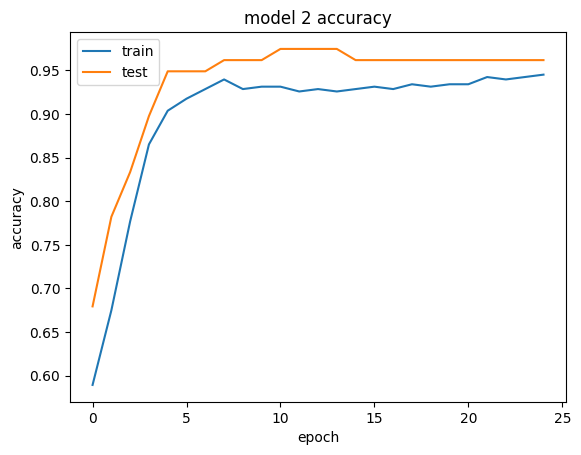

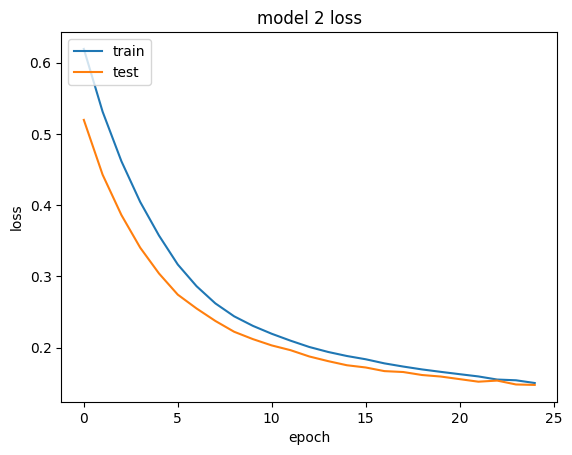

In [ ]:
#Model Accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model 2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model Loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model 2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Model_2 Performance

In [ ]:
print('Model_2 train set performance: ')
model_2.evaluate(train_x, train_y)
print('Model_2 test set performance: ')
model_2.evaluate(test_x, test_y)

Model_2 train set performance: 
12/12 [==============================] - 0s 2ms/step - loss: 0.1459 - accuracy: 0.9477
Model_2 test set performance: 
3/3 [==============================] - 0s 6ms/step - loss: 0.1446 - accuracy: 0.9620


[0.14458845555782318, 0.9620253443717957]

3/3 [==============================] - 0s 3ms/step
Confusion Matrix for Model_1
[[27  2]
 [ 1 49]]
[0.93103448 0.98      ]


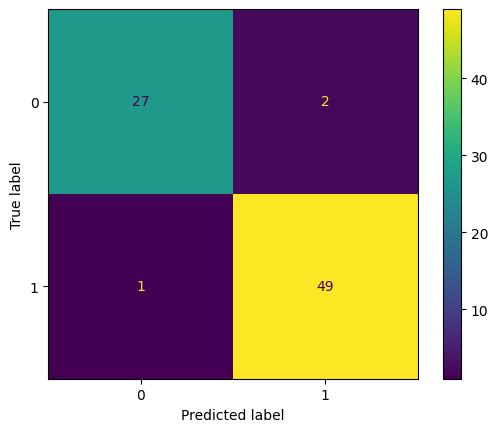

In [ ]:
y_pred2 = model_2.predict(test_x)
y_pred2 = np.round(y_pred2)
print('Confusion Matrix for Model_1')
matrix_model2 = confusion_matrix(test_y, y_pred2)
print(matrix_model2)
print(matrix_model2.diagonal() / matrix_model2.sum(axis=1))
cm_2 = ConfusionMatrixDisplay(matrix_model2)
cm_2.plot()

Model_3

In [ ]:
history3 = model_3.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=epochs,batch_size = batchs)
model_3.summary()

Epoch 1/25
73/73 [==============================] - 1s 5ms/step - loss: 0.7013 - accuracy: 0.4518 - val_loss: 0.6749 - val_accuracy: 0.5769
Epoch 2/25
73/73 [==============================] - 0s 3ms/step - loss: 0.6676 - accuracy: 0.5978 - val_loss: 0.6375 - val_accuracy: 0.6538
Epoch 3/25
73/73 [==============================] - 0s 2ms/step - loss: 0.6452 - accuracy: 0.6006 - val_loss: 0.6144 - val_accuracy: 0.6667
Epoch 4/25
73/73 [==============================] - 0s 2ms/step - loss: 0.6269 - accuracy: 0.6253 - val_loss: 0.5919 - val_accuracy: 0.6667
Epoch 5/25
73/73 [==============================] - 0s 2ms/step - loss: 0.6072 - accuracy: 0.6226 - val_loss: 0.5719 - val_accuracy: 0.7308
Epoch 6/25
73/73 [==============================] - 0s 2ms/step - loss: 0.5834 - accuracy: 0.7135 - val_loss: 0.5442 - val_accuracy: 0.7436
Epoch 7/25
73/73 [==============================] - 0s 3ms/step - loss: 0.5567 - accuracy: 0.7190 - val_loss: 0.5192 - val_accuracy: 0.7179
Epoch 8/25
73/73 [==

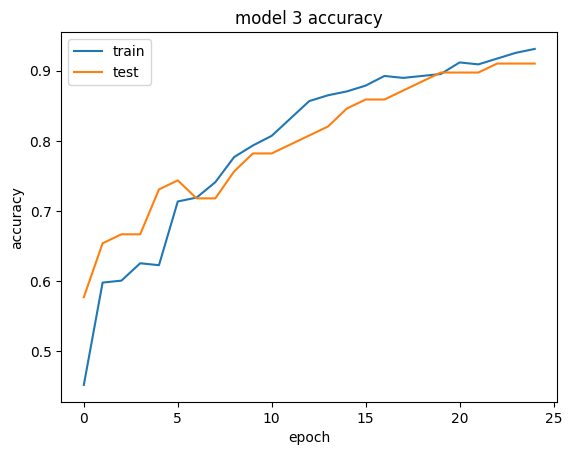

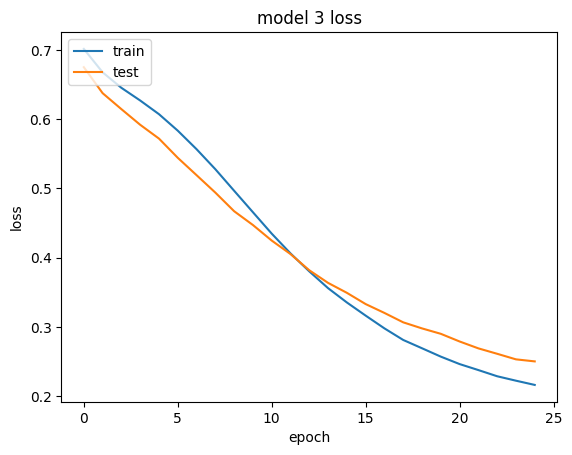

In [ ]:
# Model Accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model 3 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model Loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model 3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Model_3 Performance

In [ ]:
print('Model_3 train set performance: ')
model_3.evaluate(train_x, train_y)
print('Model_3 test set performance: ')
model_3.evaluate(test_x, test_y)

Model_3 train set performance: 
12/12 [==============================] - 0s 2ms/step - loss: 0.2104 - accuracy: 0.9284
Model_3 test set performance: 
3/3 [==============================] - 0s 4ms/step - loss: 0.2397 - accuracy: 0.9114


[0.23972994089126587, 0.9113923907279968]

3/3 [==============================] - 0s 4ms/step
Confusion Matrix for Model_3
[[25  4]
 [ 3 47]]
[0.86206897 0.94      ]


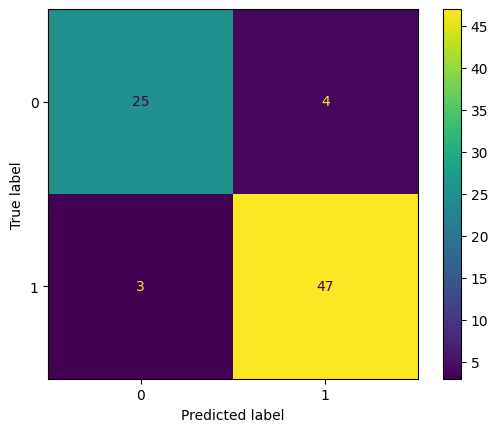

In [ ]:
y_pred3 = model_3.predict(test_x)
y_pred3 = np.round(y_pred3)
print('Confusion Matrix for Model_3')
matrix_model3 = confusion_matrix(test_y, y_pred3)
print(matrix_model3)
print(matrix_model3.diagonal() / matrix_model3.sum(axis=1))
cm_3 = ConfusionMatrixDisplay(matrix_model3)
cm_3.plot()

ROC curve

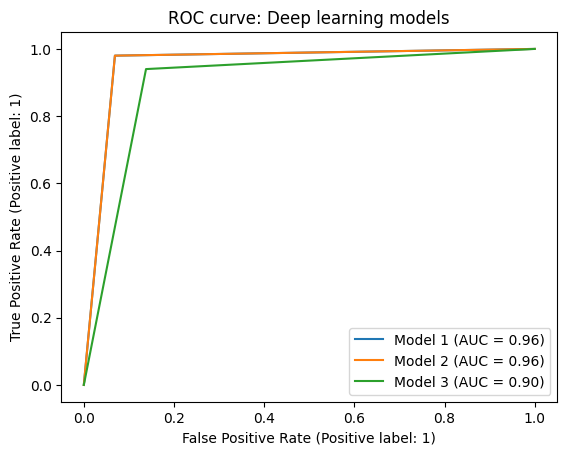

In [ ]:
ax = plt.gca()
plt.title('ROC curve: Deep learning models')
RocCurveDisplay.from_predictions(test_y, y_pred, ax=ax, name='Model 1')
RocCurveDisplay.from_predictions(test_y, y_pred2, ax=ax, name='Model 2')
RocCurveDisplay.from_predictions(test_y, y_pred3, ax=ax, name='Model 3')
plt.show()